In [ ]:
# 1. IMPORT LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D, Dense
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# 2. DATA LOADING & PREPROCESSING
max_words = 10000
max_sequence_length = 900

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences (if shorter, pad with 0; if longer, truncate from beginning)
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)

In [ ]:
# 3. MODEL BUILDING

model = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
# 4. MODEL TRAINING

history = model.fit(
    x_train, y_train,
    batch_size=512,
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6168 - loss: 0.6795 - val_accuracy: 0.7964 - val_loss: 0.5871
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.8057 - loss: 0.5370 - val_accuracy: 0.8260 - val_loss: 0.4211
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.8490 - loss: 0.3777 - val_accuracy: 0.8543 - val_loss: 0.3426
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 937ms/step - accuracy: 0.8762 - loss: 0.3044 - val_accuracy: 0.8670 - val_loss: 0.3119
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8962 - loss: 0.2574 - val_accuracy: 0.8721 - val_loss: 0.2963
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9140 - loss: 0.2199 - val_accuracy: 0.8774 - val_loss: 0.2891
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9259 - loss: 0.1920 - val_accuracy: 0.8783 - val_loss: 0.2881
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9391 - loss: 0.1697 - val_accuracy: 0.8794 - val_lo

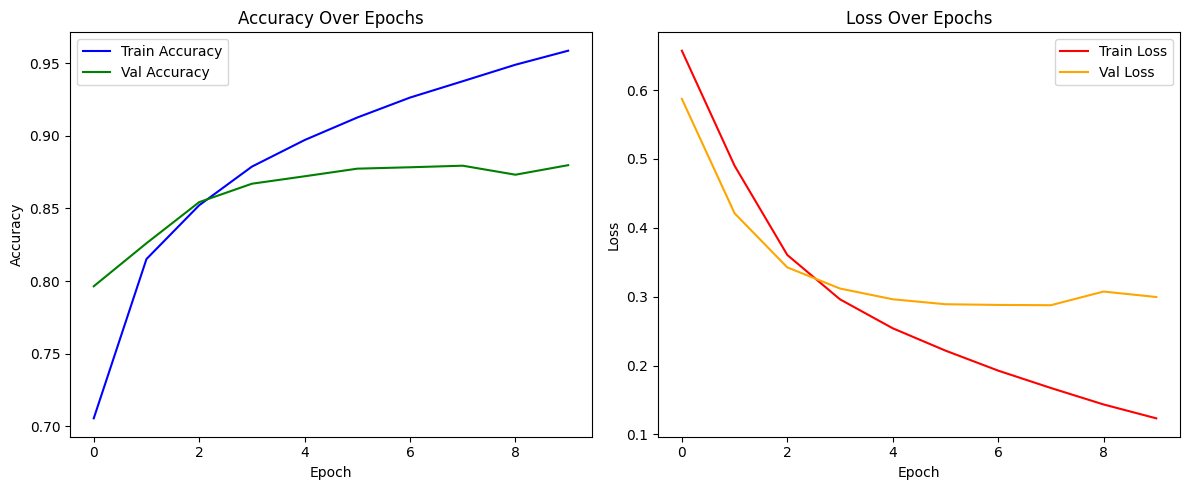

In [ ]:
# 5. VISUALIZATION

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 6. MODEL EVALUATION

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8777 - loss: 0.2978
Test Loss: 0.2995738685131073
Test Accuracy: 0.8797600269317627


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


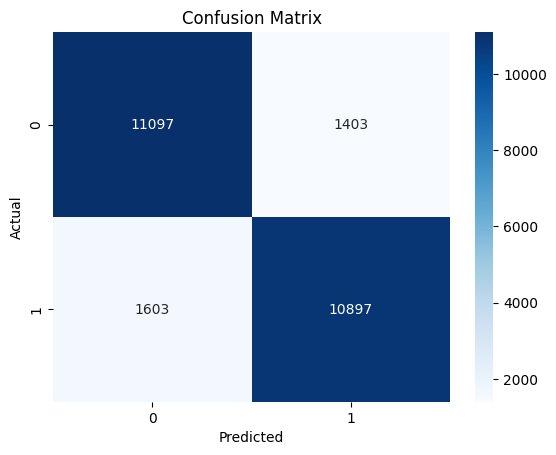

In [ ]:
# 7. CONFUSION MATRIX & CLASSIFICATION REPORT

y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# 8. SAMPLE PREDICTION

index = 5  # Change the index to test different samples

sample_review = np.expand_dims(x_test[index], axis=0)
pred_prob = model.predict(sample_review)[0][0]
pred_label = int(pred_prob > 0.5)

print("\nSample Review Prediction:")
print(f"Predicted Probability: {pred_prob:.4f}")
print("Predicted Sentiment:", "Positive " if pred_label == 1 else "Negative ")
print("Actual Sentiment   :", "Positive " if y_test[index] == 1 else "Negative ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Sample Review Prediction:
Predicted Probability: 0.9250
Predicted Sentiment: Positive 😊
Actual Sentiment   : Positive 😊
